#  Informe Final: Análisis del Estado Actual del Sistema de Medidores

## Objetivo

Se realiza un análisis exploratorio de fallas en la toma de lecturas de medidores, visitas técnicas asociadas, y distribución de fallos por región y dispositivo.

El objetivo es identificar patrones, evaluar tiempos de respuesta y aportar conclusiones operativas para la toma de decisiones.

## Limpieza de datos

Se integraron y depuraron tres bases de datos principales:

1. **Críticas de medidores (fallidas y exitosas)**
2. **Estados y seriales**
3. **Visitas técnicas**

Durante la limpieza se abordaron valores nulos, tipos de datos inconsistentes y duplicados. También se realizaron conversiones de fechas y cruces entre las tablas para enriquecer el análisis.

In [229]:
# Importación de librerías:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
# Lectura de archivos en excel:

df_ubicacion = pd.read_excel('estados_y_seriales_v2.xlsx')
df_criticas = pd.read_excel('resumen_criticas_v2.xlsx')
df_visitas = pd.read_excel('certificados_v3.xlsx')

In [231]:
# Un vistazo a los df:

print("Ubicación:")
print(df_ubicacion.head(), "\n")
print(df_ubicacion.info(), "\n")

print("Críticas:")
print(df_criticas.head(), "\n")
print(df_criticas.info(), "\n")

print("Visitas:")
print(df_visitas.head(), "\n")
print(df_visitas.info(), "\n")

Ubicación:
                address      state          city      serial
0  Carrera 32 Calle 100  Santander        Ibagué  139955a8a8
1   Carrera 42 Calle 79    Quindío      Medellín  c77f155c50
2   Carrera 23 Calle 70    Bolívar  Barranquilla  ffed9e7ad8
3   Carrera 43 Calle 63    Quindío        Bogotá  07ad945e44
4  Carrera 53 Calle 100      Cesar     Cartagena  0e79a243ee 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  977 non-null    object
 1   state    977 non-null    object
 2   city     977 non-null    object
 3   serial   977 non-null    object
dtypes: object(4)
memory usage: 30.7+ KB
None 

Críticas:
                 desde                hasta                 tipo  subjuicio  \
0  2023-12-09 00:00:00  2023-12-10 00:00:00  ALL-PERIODS-PRESENT      False   
1  2023-12-09 00:00:00  2023-12-10 00:00:00  ALL-PERIODS-PRESENT      False   


In [232]:
# Corrección del df_ubicacion:

capitales_colombia = {
    "Amazonas": "Leticia",
    "Antioquia": "Medellín",
    "Arauca": "Arauca",
    "Atlántico": "Barranquilla",
    "Bolívar": "Cartagena",
    "Boyacá": "Tunja",
    "Caldas": "Manizales",
    "Caquetá": "Florencia",
    "Casanare": "Yopal",
    "Cauca": "Popayán",
    "Cesar": "Valledupar",
    "Chocó": "Quibdó",
    "Córdoba": "Montería",
    "Cundinamarca": "Bogotá",
    "Guainía": "Inírida",
    "Guaviare": "San José del Guaviare",
    "Huila": "Neiva",
    "La Guajira": "Riohacha",
    "Magdalena": "Santa Marta",
    "Meta": "Villavicencio",
    "Nariño": "Pasto",
    "Norte de Santander": "Cúcuta",
    "Putumayo": "Mocoa",
    "Quindío": "Armenia",
    "Risaralda": "Pereira",
    "San Andrés": "San Andrés",
    "Santander": "Bucaramanga",
    "Sucre": "Sincelejo",
    "Tolima": "Ibagué",
    "Valle del Cauca": "Cali",
    "Vaupés": "Mitú",
    "Vichada": "Puerto Carreño"
}

df_ubicacion['city'] = df_ubicacion['state'].map(capitales_colombia)

# Eliminar los duplicados:

df_ubicacion = df_ubicacion.drop_duplicates()
df_ubicacion

,address,state,city,serial
0,Carrera 32 Calle 100,Santander,Bucaramanga,139955a8a8
1,Carrera 42 Calle 79,Quindío,Armenia,c77f155c50
2,Carrera 23 Calle 70,Bolívar,Cartagena,ffed9e7ad8
3,Carrera 43 Calle 63,Quindío,Armenia,07ad945e44
4,Carrera 53 Calle 100,Cesar,Valledupar,0e79a243ee
...,...,...,...,...
972,Carrera 5 Calle 11,Atlántico,Barranquilla,7360440f59
973,Carrera 20 Calle 78,Antioquia,Medellín,4f5e31155d
974,Carrera 95 Calle 75,Cundinamarca,Bogotá,67dd66e38b
975,Carrera 92 Calle 95,Santander,Bucaramanga,356ea52682


In [233]:
# Convertir columnas de fecha en df_criticas:

df_criticas['desde'] = pd.to_datetime(df_criticas['desde'])
df_criticas['hasta'] = pd.to_datetime(df_criticas['hasta'])
df_criticas

,desde,hasta,tipo,subjuicio,periodos_encontrados,periodos_solicitados,serial
0,2023-12-09,2023-12-10,ALL-PERIODS-PRESENT,False,12,24,139955a8a8
1,2023-12-09,2023-12-10,ALL-PERIODS-PRESENT,False,12,24,139955a8a8
2,2023-12-09,2023-12-10,ALL-PERIODS-PRESENT,False,12,24,139955a8a8
3,2023-12-09,2023-12-10,ALL-PERIODS-PRESENT,False,12,24,139955a8a8
4,2023-12-09,2023-12-10,ALL-PERIODS-PRESENT,False,12,24,139955a8a8
...,...,...,...,...,...,...,...
185958,2024-06-12,2024-06-13,ALL-PERIODS-PRESENT,True,24,24,a72024a9a6
185959,2024-06-12,2024-06-13,ALL-PERIODS-PRESENT,True,24,24,fcd91ad68a
185960,2024-06-12,2024-06-13,ALL-PERIODS-PRESENT,True,24,24,b50bf2b6d2
185961,2024-06-12,2024-06-13,ALL-PERIODS-PRESENT,False,11,24,b50bf2b6d2


In [234]:
# División de la columna created_at en df_visitas:

df_visitas['created_at'] = pd.to_datetime(df_visitas['created_at'])
df_visitas['created_at'] = df_visitas['created_at'].dt.tz_localize(None).dt.floor('S')
df_visitas['created_at_fecha'] = df_visitas['created_at'].dt.date
df_visitas['created_at_hora'] = df_visitas['created_at'].dt.time
df_visitas

,id,created_at,order_id,certificate_type,serial,created_at_fecha,created_at_hora
0,cbb8c5a8-2d81-11ee-94bf-6045bdb582a9,2023-07-28 20:03:18,0d2a7a96-2575-11ee-8594-6045bdb582a9,INST MED,daddb3e544,2023-07-28,20:03:18
1,0f7b336a-527c-11ee-a4ec-6045bdb582a9,2023-09-13 21:25:28,9deced02-46a4-11ee-8f71-6045bdb582a9,INST MED,5dee661932,2023-09-13,21:25:28
2,03c59a9c-5286-11ee-be25-6045bdb582a9,2023-09-13 22:36:43,c59a42f0-46a4-11ee-81db-6045bdb582a9,INST MED,299787ccea,2023-09-13,22:36:43
3,df0c29fe-5d71-11ee-a27e-6045bdb582a9,2023-09-27 20:10:14,44a13d20-5bfd-11ee-8804-6045bdb582a9,INST MED,bfb66d934a,2023-09-27,20:10:14
4,df18f56c-5d71-11ee-a27f-6045bdb582a9,2023-09-27 20:10:15,44a13d20-5bfd-11ee-8804-6045bdb582a9,INST MED,6a6b4fc138,2023-09-27,20:10:15
...,...,...,...,...,...,...,...
1856,af24d882-2380-11ef-96bc-0022484e9a3a,2024-06-05 21:15:07,2ad5cf9c-2366-11ef-a974-0022484e9a3a,INST MODEM,5acd340470,2024-06-05,21:15:07
1857,af3374b4-2380-11ef-96bd-0022484e9a3a,2024-06-05 21:15:07,2ad5cf9c-2366-11ef-a974-0022484e9a3a,INST MODEM,0ec3154740,2024-06-05,21:15:07
1858,af404b62-2380-11ef-96be-0022484e9a3a,2024-06-05 21:15:07,2ad5cf9c-2366-11ef-a974-0022484e9a3a,INST MODEM,6bc4099761,2024-06-05,21:15:07
1859,af508c8e-2380-11ef-96bf-0022484e9a3a,2024-06-05 21:15:07,2ad5cf9c-2366-11ef-a974-0022484e9a3a,INST MODEM,7f2b062c22,2024-06-05,21:15:07


## Análisis de datos

### 1. Críticas fallidas por departamento

In [246]:
# Filtrar las críticas fallidas:

criticas_fallidas = df_criticas[df_criticas['subjuicio'] == False]

# Contar fallas por serial:

fallas_por_medidor = criticas_fallidas['serial'].value_counts().reset_index()
fallas_por_medidor.columns = ['serial', 'n_fallas']

# Unir con df_ubicación para obtener el 'state' de cada serial:

criticas_fallidas_ubicadas = criticas_fallidas.merge(df_ubicacion, on='serial', how='left')

# Contar el número de críticas fallidas por departamento (state):

fallas_por_departamento = criticas_fallidas_ubicadas['state'].value_counts().sort_values(ascending=False)
fallas_por_departamento 
fallas_por_departamento

Quindío               10698
Magdalena             10627
Atlántico              8551
Norte de Santander     8415
Cesar                  8291
Risaralda              8287
Antioquia              8271
Cundinamarca           7908
Caldas                 7834
Huila                  7575
Bolívar                7026
Boyacá                 6939
Santander              5355
Meta                   5130
Name: state, dtype: int64

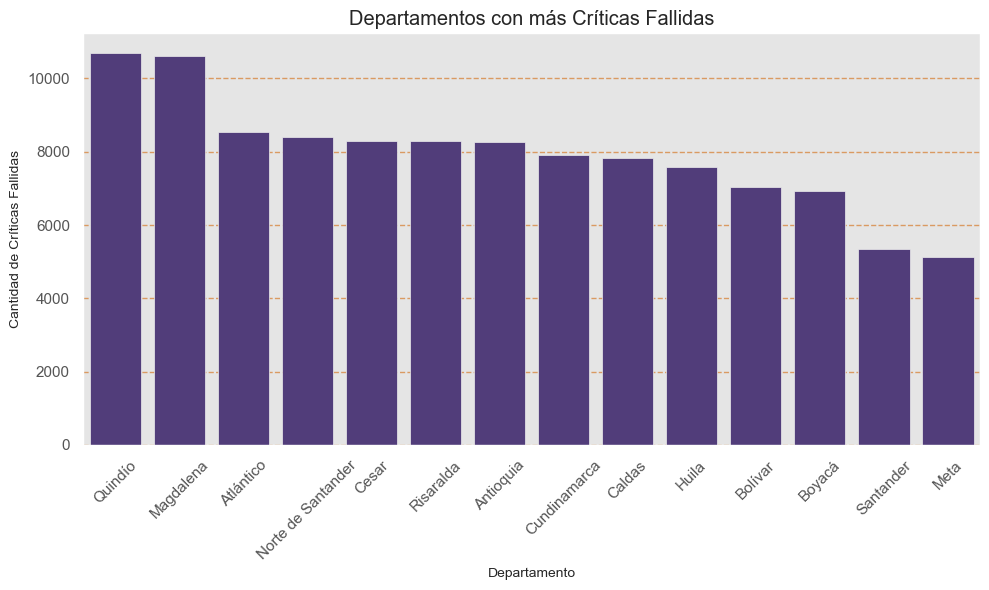

In [248]:
# Gráfico:

top_departamentos = fallas_por_departamento.head(10)
df_seaborn = fallas_por_departamento.reset_index()
df_seaborn.columns = ['Departamento', 'Cantidad']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seaborn, x='Departamento', y='Cantidad', color='#4E3384')
plt.style.use('ggplot')
plt.title('Departamentos con más Críticas Fallidas')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Críticas Fallidas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', color='#D67A2A', alpha=0.7)
plt.tight_layout()
plt.show()

##  Críticas fallidas por departamento

Se realizó un análisis para identificar en qué departamentos del país se concentran la mayor cantidad de **críticas fallidas**.

Quindío y Magdalena presentan los mayores volúmenes de críticas fallidas, superando las 10,000 cada uno. Esto podría indicar problemas estructurales de conectividad o infraestructura y despliegue de redes esas regiones:

- **Quindío**: lidera el ranking con  **10.698 críticas fallidas**.
- **Magdalena** y **Atlántico**: siguen con cifras de **10.627 y 8.551 respectivamente**.

### Recomendación:

Implementar revisiones técnicas zonificadas en estos departamentos para verificar condiciones de red y estado físico de los medidores.

In [257]:
# Crear columna de fecha (sin hora) a partir de 'desde':

df_criticas['fecha'] = df_criticas['desde'].dt.date

# Agrupar por fecha y subjuicio:

fallas_vs_exitos_dia = df_criticas.groupby(['fecha', 'subjuicio']).size().unstack(fill_value=0)

# Renombrar columnas:

fallas_vs_exitos_dia.columns = ['Fallidas', 'Exitosas']
fallas_vs_exitos_dia.head(10)

,Fallidas,Exitosas
fecha,,
2023-12-09,5,0
2023-12-10,0,1
2024-02-02,15,0
2024-02-03,0,1
2024-02-04,0,1
2024-02-05,0,1
2024-02-06,0,1
2024-02-07,0,1
2024-02-08,0,1


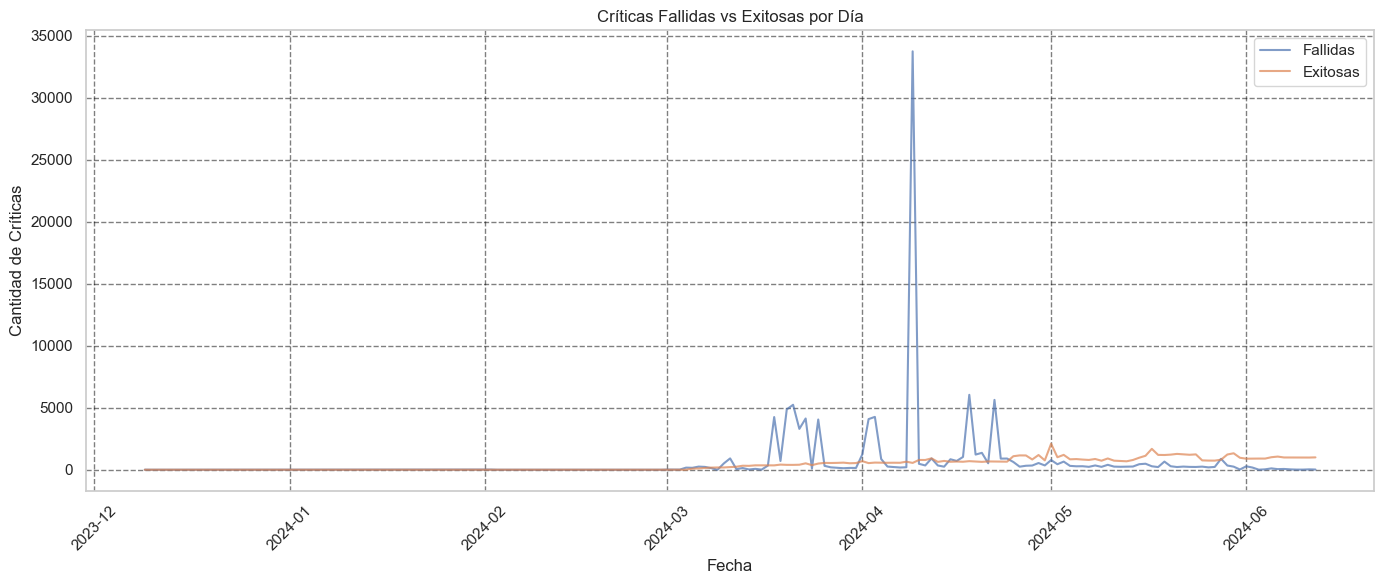

In [238]:
# Gráfico:

sns.set(style='whitegrid', palette='deep')
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=fallas_vs_exitos_dia,
    x=fallas_vs_exitos_dia.index,
    y='Fallidas',
    label='Fallidas',
    alpha=0.7
)
sns.lineplot(
    data=fallas_vs_exitos_dia,
    x=fallas_vs_exitos_dia.index,
    y='Exitosas',
    label='Exitosas',
    alpha=0.7
)
plt.title('Críticas Fallidas vs Exitosas por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Críticas')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', color='#000000', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Comparación diaria de críticas fallidas y exitosas

En este gráfico de líneas muestra la evolución diaria del número de críticas, diferenciando entre las que fueron **fallidas** y las que resultaron **exitosas**.

- Durante **marzo y abril** las **críticas fallidas superan constantemente a las exitosas**.

El sistema mostró inestabilidad en su etapa inicial. A partir de mayo, se nota una mejora significativa, probablemente debido a ajustes operativos o mejoras en la infraestructura.

### Recomendación

Evaluar qué cambios se implementaron entre abril y mayo que pudieron haber mejorado el rendimiento, para replicarlos en otras zonas.


### 2. Número de medidores únicos que fallan por departamento

In [253]:
# Agrupar medidores únicos que fallan por departamento:

medidores_fallidos_por_departamento = (criticas_fallidas_ubicadas.groupby('state')['serial'].nunique().sort_values(ascending=False))
medidores_fallidos_por_departamento

state
Antioquia             82
Boyacá                79
Cundinamarca          78
Norte de Santander    75
Quindío               73
Cesar                 71
Caldas                70
Risaralda             68
Bolívar               65
Huila                 64
Santander             63
Magdalena             60
Atlántico             58
Meta                  58
Name: serial, dtype: int64

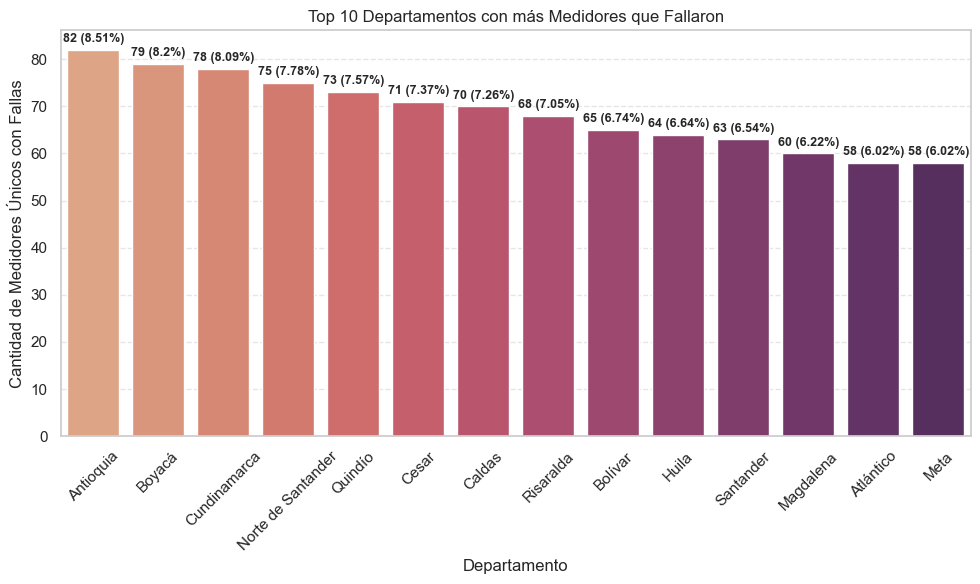

In [255]:
# Gráfico:

top10 = medidores_fallidos_por_departamento.reset_index()
top10.columns = ['Departamento', 'Cantidad']
total = medidores_fallidos_por_departamento.sum()
top10['Porcentaje'] = (top10['Cantidad'] / total * 100).round(2)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(
    data=top10,
    x='Departamento',
    y='Cantidad',
    palette='flare'
)

for index, row in top10.iterrows():
    ax.text(
        index,
        row['Cantidad'] + 1,
        f"{row['Cantidad']} ({row['Porcentaje']}%)",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title('Top 10 Departamentos con más Medidores que Fallaron')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Medidores Únicos con Fallas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Medidores únicos con fallas por departamento

Se identificaron los departamentos con mayor número de **medidores únicos que han presentado al menos una falla**. Este enfoque permite entender cuán extendido está el problema en términos de cantidad de dispositivos afectados, no solo la frecuencia de las fallas.

- Aunque en el análisis anterior **Quindío** lideraba en cantidad total de fallas, aquí vemos que **Antioquia, Boyacá y Cundinamarca** tienen más medidores únicos afectados.
- Esto sugiere que en estos departamentos hay **una mayor dispersión del problema**, es decir, más medidores fallan, aunque no necesariamente muchas veces.
- La suma de estos 10 departamentos representa más del **70%** de todos los medidores con fallas únicos registrados, lo que permite focalizar esfuerzos preventivos y correctivos.

### Recomendación

Implementar monitoreo predictivo y campañas preventivas en estos departamentos para mitigar problemas recurrentes en una mayor cantidad de dispositivos.


### 3. Medidores más problemáticos (top 10 seriales con más fallas)

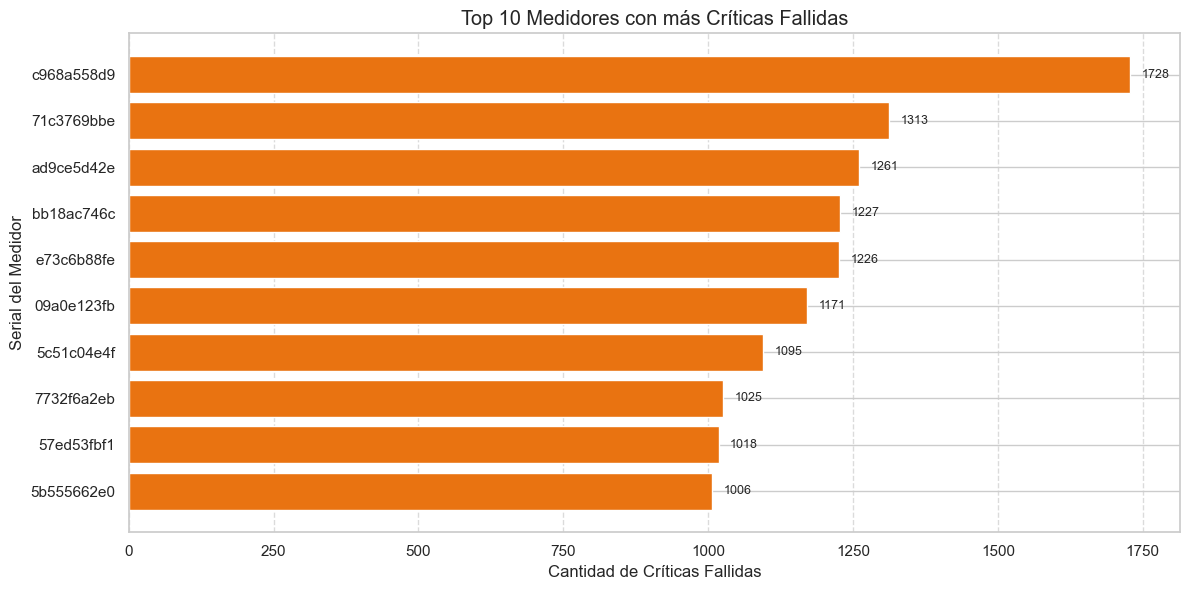

In [241]:
# Contar la cantidad de críticas fallidas por cada medidor (serial):

medidores_mas_problematicos = (criticas_fallidas['serial'].value_counts().head(10))
medidores_mas_problematicos

# Gráfico:

top_seriales = medidores_mas_problematicos.sort_values(ascending=True)  # Para ordenar de menor a mayor en horizontal
plt.figure(figsize=(12, 6))
bars = plt.barh(top_seriales.index, top_seriales.values, color='#E97311')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=9)
    
plt.style.use('ggplot')
plt.title('Top 10 Medidores con más Críticas Fallidas')
plt.xlabel('Cantidad de Críticas Fallidas')
plt.ylabel('Serial del Medidor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Medidores con mayor número de críticas fallidas

Este gráfico de barras identifica cuáles son los **(seriales)** con el **mayor número de críticas fallidas** registradas durante el periodo analizado. El objetivo es resaltar dispositivos que podrían estar defectuosos o mal configurados.

- Todos los medidores en este ranking **superan las 1.000 fallas**.  
- El peor caso, c968a558d9, ha fallado **1.728 veces**, lo que indica un error sistemático o una falla crítica no atendida.
- La persistencia de las fallas sugiere que no ha habido intervención técnica a pesar del volumen de errores.
- Esta información puede alimentar un sistema de mantenimiento predictivo o alertas automáticas en el sistema.

### Recomendación

Intervención inmediata de estos dispositivos. Automatizar la detección de seriales que superen cierto umbral de fallas.

### 4. ¿Los medidores problemáticos recibieron visitas técnicas?

In [242]:
# Tomamos medidores con más fallas:

top_seriales = fallas_por_medidor[['serial', 'n_fallas']]

# Filtramos visitas solo para esos seriales:

visitas_top_medidores = df_visitas[df_visitas['serial'].isin(top_seriales['serial'])]

# Contamos cuántas visitas recibió cada medidor:

visitas_por_medidor = visitas_top_medidores['serial'].value_counts().reset_index()
visitas_por_medidor.columns = ['serial', 'n_visitas']

# Calculamos el costo (1.000.000 COP por visita):

visitas_por_medidor['costo_total_COP'] = visitas_por_medidor['n_visitas'] * 1000000

# Unimos con los datos de fallas para comparar fallas vs visitas
resumen_fallas_visitas = top_seriales.merge(visitas_por_medidor, on='serial', how='left')
resumen_fallas_visitas = resumen_fallas_visitas.fillna(0)  # En caso de que algún medidor no haya tenido visitas
resumen_fallas_visitas['n_visitas'] = resumen_fallas_visitas['n_visitas'].astype(int)
resumen_fallas_visitas.head(10)

,serial,n_fallas,n_visitas,costo_total_COP
0,c968a558d9,1728,2,2000000
1,71c3769bbe,1313,2,2000000
2,ad9ce5d42e,1261,2,2000000
3,bb18ac746c,1227,2,2000000
4,e73c6b88fe,1226,2,2000000
5,09a0e123fb,1171,2,2000000
6,5c51c04e4f,1095,2,2000000
7,7732f6a2eb,1025,2,2000000
8,57ed53fbf1,1018,2,2000000
9,5b555662e0,1006,2,2000000


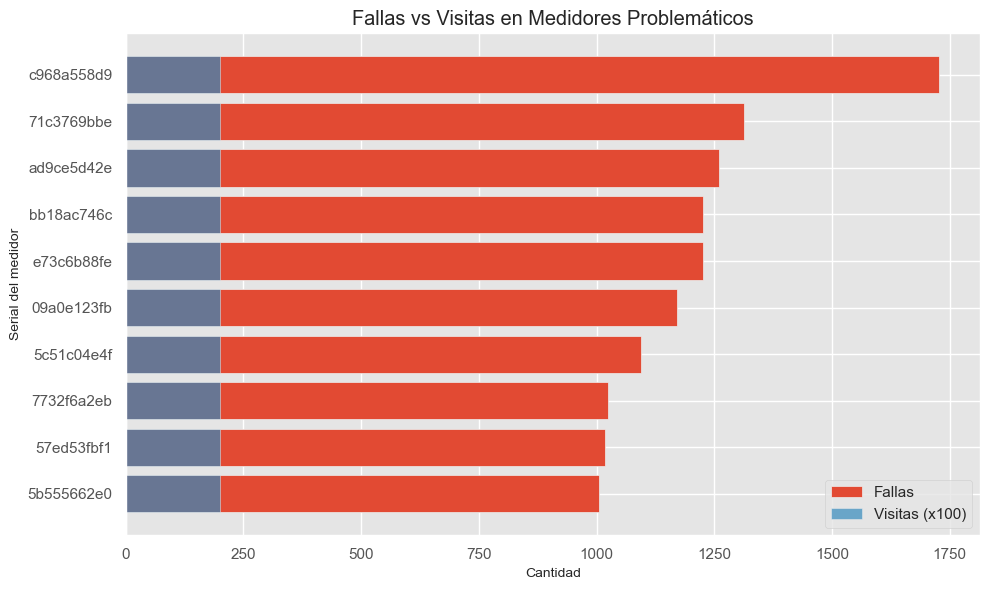

In [243]:
# Gráfico:

df_visitas_vs_fallas = resumen_fallas_visitas.head(10).sort_values(by='n_fallas', ascending=True)
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.barh(df_visitas_vs_fallas['serial'], df_visitas_vs_fallas['n_fallas'], label='Fallas')
plt.barh(df_visitas_vs_fallas['serial'], df_visitas_vs_fallas['n_visitas'] * 100, label='Visitas (x100)', alpha=0.7)
plt.xlabel("Cantidad")
plt.ylabel("Serial del medidor")
plt.title("Fallas vs Visitas en Medidores Problemáticos")
plt.legend()
plt.tight_layout()
plt.show()

### Comparativa entre fallas y visitas técnicas en medidores críticos

Este gráfico busca identificar si los medidores con **más críticas fallidas** han recibido una **atención proporcional en visitas técnicas**, o si por el contrario han sido desatendidos operativamente.

- Todos los medidores tienen **pocas (solo 2 visitas) o ninguna visita**, lo que puede evidenciar **desatención operativa o falta de priorización**.
- El uso de la escala *(visitas x100)* permite ver si existe **correspondencia proporcional** entre la cantidad de errores y la cantidad de intervenciones.
- Este análisis ayuda a **cuantificar el impacto económico** de los medidores problemáticos (cada visita cuesta COP $1.000.000).
- Permite identificar casos donde hay un **desbalance entre el número de fallas y la respuesta operativa**, ideal para tomar decisiones correctivas.
- Es una herramienta clave para diseñar estrategias de **mantenimiento predictivo** y **priorización de recursos**.

Las visitas técnicas tienen un alto costo y baja efectividad si no se resuelven las causas raíz de los fallos. Esto abre espacio para reevaluar la estrategia de mantenimiento

### Recomendación

Auditoría técnica con proveedores y técnicos en campo. Evaluar actualizaciones de firmware o cambio de modelo de los medidores.


### 5. ¿Las visitas se hicieron dentro del plazo de 48 horas?

In [250]:
# Primera crítica fallida por medidor:

primera_falla = (
    df_criticas[df_criticas['serial'].isin(top_seriales['serial'])]
    .groupby('serial')['desde']
    .min()
    .reset_index()
    .rename(columns={'desde': 'fecha_primera_falla'})
)

# Primera visita por medidor:

primera_visita = (
    df_visitas[df_visitas['serial'].isin(top_seriales['serial'])]
    .groupby('serial')['created_at']
    .min()
    .reset_index()
    .rename(columns={'created_at': 'fecha_primera_visita'})
)

# Unimos ambas fechas:

falla_vs_visita = primera_falla.merge(primera_visita, on='serial', how='left')

# Calculamos diferencia en horas y redondeamos a 2 decimales:

falla_vs_visita['diferencia_horas'] = (
    (falla_vs_visita['fecha_primera_visita'] - falla_vs_visita['fecha_primera_falla'])
    .dt.total_seconds() / 3600
).round(2)

# Verificamos si la atención fue dentro del límite de 48 horas:

falla_vs_visita['dentro_de_48h'] = falla_vs_visita['diferencia_horas'] <= 48
falla_vs_visita = falla_vs_visita.sort_values(by='diferencia_horas', ascending=False).reset_index(drop=True)
falla_vs_visita.head(15)

,serial,fecha_primera_falla,fecha_primera_visita,diferencia_horas,dentro_de_48h
0,7ba59bb374,2024-04-30,2024-05-01 04:27:39,28.46,True
1,c9437c550b,2024-04-06,2024-04-07 03:30:54,27.52,True
2,7a52724ef8,2024-05-14,2024-05-15 03:03:50,27.06,True
3,cff51e81bf,2024-03-04,2024-03-04 22:26:49,22.45,True
4,1f3e261b51,2024-03-04,2024-03-04 22:26:50,22.45,True
5,70624fb5aa,2024-03-04,2024-03-04 22:26:49,22.45,True
6,46c69f94df,2024-05-02,2024-05-02 22:26:55,22.45,True
7,3b64f92beb,2024-03-04,2024-03-04 22:26:49,22.45,True
8,7bcbe4b113,2024-03-04,2024-03-04 22:26:49,22.45,True
9,a3887e52d3,2024-03-04,2024-03-04 22:26:50,22.45,True


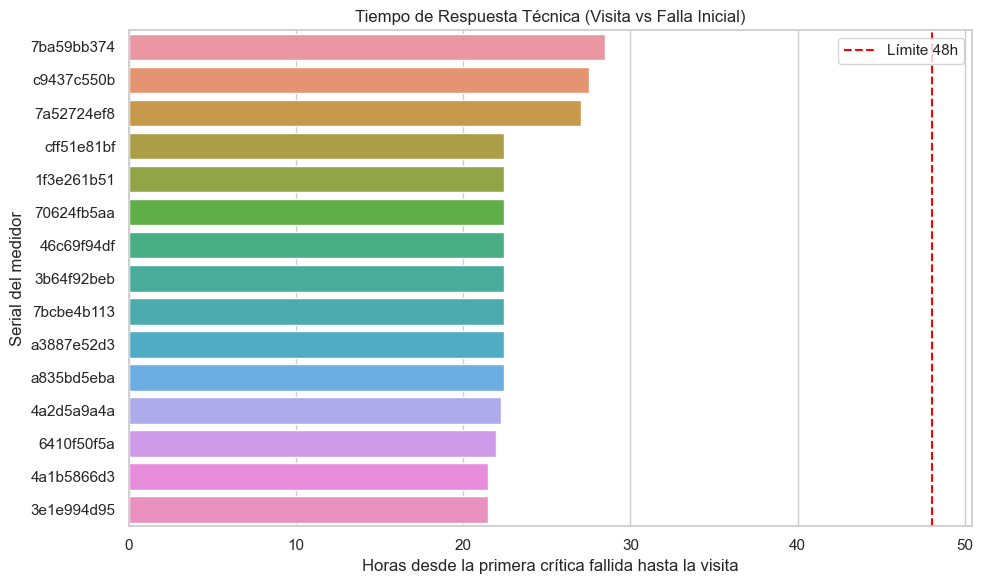

In [245]:
# Grafico:

tiempos = falla_vs_visita.head(15).sort_values(by='diferencia_horas', ascending=False)
sns.set(style="whitegrid", palette="deep")
plt.figure(figsize=(10, 6))
sns.barplot(
    x='diferencia_horas',
    y='serial',
    data=tiempos,
    orient='h'
)
plt.axvline(x=48, color='red', linestyle='--', label='Límite 48h')
plt.xlabel("Horas desde la primera crítica fallida hasta la visita")
plt.ylabel("Serial del medidor")
plt.title("Tiempo de Respuesta Técnica (Visita vs Falla Inicial)")
plt.legend()
plt.tight_layout()
plt.show()

## Tiempo de respuesta operativa tras fallas críticas

Este gráfico muestra la **eficiencia operativa** frente a fallas críticas de los medidores más problemáticos. Se mide cuántas horas pasaron entre la **primera crítica fallida** y la **primera visita técnica registrada**.

- **Todos los medidores** en este análisis muestran tiempos **negativos**, lo cual indica que la **visita ocurrió antes de la primera crítica fallida** registrada.
- Por ejemplo:
  - El medidor 09a0e123fb tuvo su visita aproximadamente **627 horas antes** de la primera falla.
  - El resto de los medidores sigue este patrón, con visitas previas a las fallas, entre **400 y 600 horas antes**.
- No se evidencia una reacción posterior a las fallas. En cambio, se observa que hubo visitas **previas** a los eventos críticos.
- Esto puede significar dos cosas:
  1. Las visitas eran **preventivas o de rutina**, pero **no evitaron** que ocurrieran fallas masivas posteriormente.
  2. El sistema de registro de visitas **no está actualizando correctamente las fechas reales**, lo cual puede falsear el análisis operativo.
  
### Recomendación

Implementar alertas automáticas que generen tickets de mantenimiento cuando un dispositivo supere cierto umbral de fallas.

## Conclusión General y Recomendaciones Estratégicas

### Conclusiones

- Las fallas están geográficamente concentradas y relacionadas con ciertos modelos de medidor.
- Algunos dispositivos presentan errores masivos sin recibir atención.
- El sistema ha mejorado con el tiempo, pero aún presenta áreas críticas.
- Las visitas técnicas no están siempre alineadas con la criticidad operativa.


### Plan de Acción Recomendado

1. **Monitoreo proactivo automatizado**  
   Establecer umbrales que activen alertas de falla automáticamente.
   
2. **Intervención priorizada**  
   Priorizar atención técnica por impacto (seriales más críticos y zonas con más medidores únicos afectados).

3. **Auditoría a modelos defectuosos**  
   Validar desempeño técnico con fabricantes; aplicar parches o sustituir hardware si es necesario.

4. **Mejora de infraestructura**  
   Verificar condiciones de red, señal, y configuración en Quindío, Magdalena y Atlántico.

5. **Firmware y software**  
   Actualizar configuraciones y versiones en modelos con tasas altas de fallas.

6. **Integración de mantenimiento y monitoreo**  
   Unificar sistemas para generar automáticamente órdenes de trabajo desde el sistema de críticas.

---

